# Espinardo FIB

#### FIB measurements @ Espinardo campus

- Sample C: 10^17 molecules /cm3

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
from IPython.display import Image as IM
from IPython.display import Math
from IPython.display import Latex

In [3]:
from PIL import Image, ImageFilter

In [4]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jul  9 09:13:46 2019


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tables            as tb
import random
import glob
import warnings
sns.set()

In [6]:
from sabat.sbt_espinardo import get_jpeg_dirs
from sabat.sbt_espinardo import get_files
from sabat.sbt_espinardo import read_xls_files
from sabat.sbt_espinardo import sort_by_list
from sabat.sbt_espinardo import sort_files
from sabat.sbt_espinardo import load_LIVE_images
from sabat.sbt_espinardo import expo_seed
from sabat.sbt_espinardo import  get_live_dirs
from sabat.sbt_espinardo import get_profile
from sabat.sbt_espinardo import display_profile
from sabat.sbt_espinardo import display_profiles_before_after
from sabat.sbt_espinardo import plot_LIVE_images
from sabat.sbt_espinardo import plot_LIVE_avg
from sabat.sbt_espinardo import plot_avg_intensity
from sabat.sbt_espinardo import plot_total_intensity
from sabat.sbt_espinardo import avg_intensity
from sabat.sbt_espinardo import total_intensity
from sabat.sbt_espinardo import plot_TOM
from sabat.sbt_espinardo import get_TOM_files
from sabat.sbt_espinardo import display_profiles
from sabat.sbt_espinardo import show_toms
from sabat.sbt_espinardo import mean_and_std_toms
from sabat.sbt_espinardo import tom_I, tom_mean_I
from sabat.sbt_espinardo import fit_intensity, tom_I_max

In [7]:
import invisible_cities.core .fit_functions  as     fitf
from  invisible_cities.core.system_of_units import *

In [8]:
from sabat.sbt_types import FoV, CircularFoV, Monolayer
from sabat.sbt_types import Laser, PulsedLaser, GLaser, GaussianBeam
from sabat.sbt_types import Molecule
from sabat.sbt_types import Molecule2P
from sabat.sbt_types import DyeSample
from sabat.sbt_types import Microscope
from sabat.sbt_types import CCD
from sabat.sbt_core import  power_density
from sabat.sbt_core import  photon_density
from sabat.sbt_core import  fluorescence_per_molecule
from sabat.sbt_core import  duration_of_fluorescence
from sabat.sbt_core import  diffraction_limit
from sabat.sbt_core import  photoelectrons_per_pixel
from sabat.sbt_core import  fluorescence_2p_gb
from sabat.sbt_core import  fluorescence_2p_dl
from sabat.sbt_core import  absorbed_photons_per_fluorophore_per_pulse_2p
from sabat.sbt_types import  photon, molecule, GM, us, ucm2, ucm3, gp 

In [9]:
from sabat.sbt_core  import  FIB 
from sabat.sbt_core  import  FLUO3
from sabat.sbt_core import  Setup

In [191]:
import collections

### Samples:

- sample #1new: Fluoresceina, PVA, 3%, drop coating (>8 mW)

- sample #2: FIB, PVA, 3% (H2O), drop coating (>20 mW)

- sample #3: FIB-Ba, PVA, 3% (H2O), drop coating (>10 mW)

- sample #4: FIB, PMMA (cadena corta), 3%, drop coating (>8 mW)

- sample #5: FIB-Ba, PMMA (cadena corta), 3%, drop coating (>30 mW)

- sample #6: FIB-Ba (x10^3Ba), PMMA (cadena corta), 3%, drop coating (>50 mW)

- sample #7: FIB, PMMA (cadena larga), 3%, drop coating (>7 mW o menos!!)

- sample #8: FIB-Ba, PMMA (cadena larga), 3%, drop coating  (>7 mW o menos!!)

- sample #9: FIB-Ba (x10^3Ba), PMMA (cadena larga), 3%, drop coating  (>5 mW o menos!!)





In [10]:
path = '/Users/jjgomezcadenas/Projects/Development/data/'

In [18]:
ipath = os.path.join(path, 'Julio2019TPA', 'Filters_TOMOS')
print(ipath)

/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS


### TOM files

In [244]:
from collections import Counter

def key_number(names):
    return names.split('_')[1]

def get_names(file, isplit):
    return file.split('/')[isplit].split('.')[0]


def compose_lbl(TNS, key, isplit):
    LBL=[]
    for value in TNS[key]:
        lbl=''
        keys  = get_names(value, isplit).split('_')
        lbl = lbl + keys[3]+'_'+keys[-1]
        LBL.append(lbl)
    return LBL
 

def compose_kdict(TNS, isplit):
    TNS2 = {}
    for k in TNS.keys():
        LBL = compose_lbl(TNS, k, isplit)
        tn = {}
        for i, file in enumerate(TNS[k]):
            tn[LBL[i]] = file
        TNS2[k]=tn
    return TNS2

    
def get_TOM_files(ipath, ext='xlsx', rec=False, isplit=-1):
    """Organizes the TOM files in a dictionary"""
    
    FLS = glob.glob(ipath+f"/*.{ext}", recursive=rec)
   
    KEYS = []
    TN = []
    FILES = []
    for file in FLS:
        names = get_names(file, isplit)
        TN.append(key_number(names))
        KEYS.append(names)
        FILES.append(file)
    TNS = Counter(TN) # keys are the #numers
    for k in TNS:
        TNS[k] =[]
    
    for i, key in enumerate(KEYS):
        l = TNS[key_number(key)]
        l.append(FILES[i])
        TNS[key_number(key)] = l
    
    TNS2 = compose_kdict(TNS, isplit)

    #print(TNS2)
    return TNS2

def plot_tom_set(set_number='#2', figsize=(18,12)):
    T2 = TNS[set_number]
    OT2 = collections.OrderedDict(sorted(T2.items()))
    fig = plt.figure(figsize=figsize)
    for i, (key,file) in enumerate(OT2.items()):
        tom = pd.read_excel(file, header=None)
    
        ax      = fig.add_subplot(3, 3, i+1)
        plt.imshow(tom.values.T)
        plt.xlabel('X scan')
        plt.ylabel('Z scan')
        plt.title(key)
    plt.tight_layout()
    plt.show()


def plot_profile_set(set_number='#2', yrange=(0,100), zrange=(0,150), figsize=(18,12)):
    IP ={}
    T2 = TNS[set_number]
    OT2 = collections.OrderedDict(sorted(T2.items()))
    fig = plt.figure(figsize=figsize)
    for i, (key,file) in enumerate(OT2.items()):
        tom = pd.read_excel(file, header=None)
    
        ax      = fig.add_subplot(3, 3, i+1)
        pZ,ZV = get_profile(tom)
        plt.plot(ZV)
        plt.xticks(np.arange(min(Z), max(Z)+1, 10.))
        plt.xlim(*zrange)
        plt.ylim(*yrange)
        plt.xlabel('Z (X) pixels')
        plt.ylabel('I (a.u.)')
        plt.title(key)
        IP[key] = np.sum(ZV)
    plt.tight_layout()
    plt.show()
    return IP

In [149]:
TNS = get_TOM_files(ipath)
#print(TOM.keys())

for key, value in TNS.items():
    print(key)
    print(value)
    
print(TNS['#3']['60mW_Banda420nm'])

#3
{'60mW_Banda420nm': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#3_800nm_60mW_S1_2mic_Banda420nm.xlsx', '60mW_Banda430nm': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#3_800nm_60mW_S1_2mic_Banda430nm.xlsx', '60mW_NoFilter': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#3_800nm_60mW_S1_2mic_NoFilter.xlsx', '60mW_Alta450nm': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#3_800nm_60mW_S1_2mic_Alta450nm.xlsx', '60mW_Baja450nm': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#3_800nm_60mW_S1_2mic_Baja450nm.xlsx', '60mW_Alta435nm': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#3_800nm_60mW_S1_2mic_Alta435nm.xlsx'}
#9
{'15mW_Banda420nm': '/Users/jjgomezcadenas/Projects/Development/data/Julio2019TPA/Filters_TOMOS/TOMO_#9_800nm_15mW_S1_2mic_Banda420nm.xlsx', '15mW_Baja450nm': '/Us

### sample #2: 
- FIB, PVA, 3% drop coating

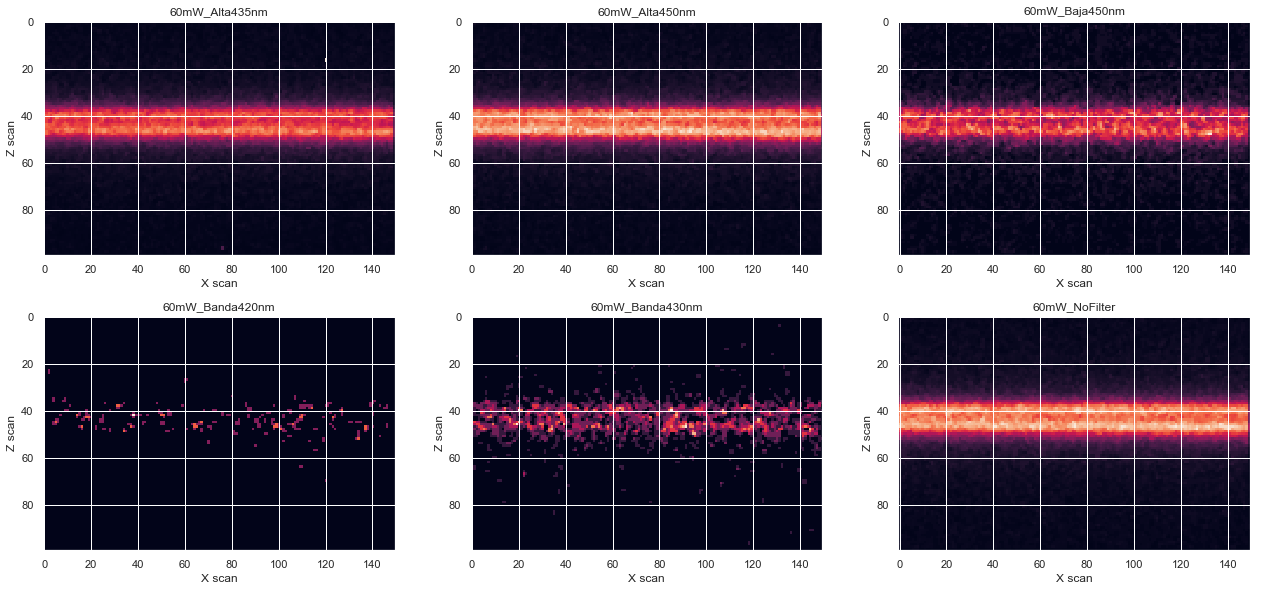

In [212]:
plot_tom_set(set_number='#2',figsize=(18,12))

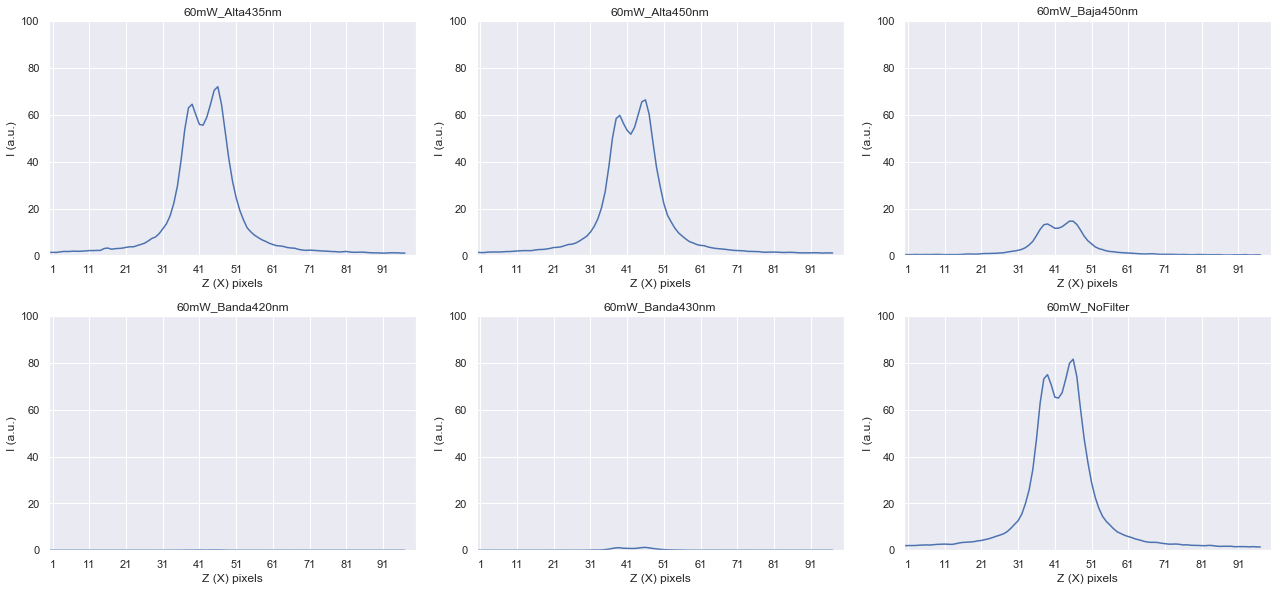

In [219]:
IP = plot_profile_set(set_number='#2', yrange=(0,100), zrange=(0,100),figsize=(18,12))

In [220]:
IP

{'60mW_Alta435nm': 1231.1033333333332,
 '60mW_Alta450nm': 1140.493333333333,
 '60mW_Baja450nm': 253.6266666666667,
 '60mW_Banda420nm': 1.02,
 '60mW_Banda430nm': 15.076666666666664,
 '60mW_NoFilter': 1444.9733333333334}

In [222]:
IP['60mW_Alta435nm']/IP['60mW_NoFilter']

0.8519903481494467

### sample #3: 
- FIB-Ba, PVA, 3%  drop coating 

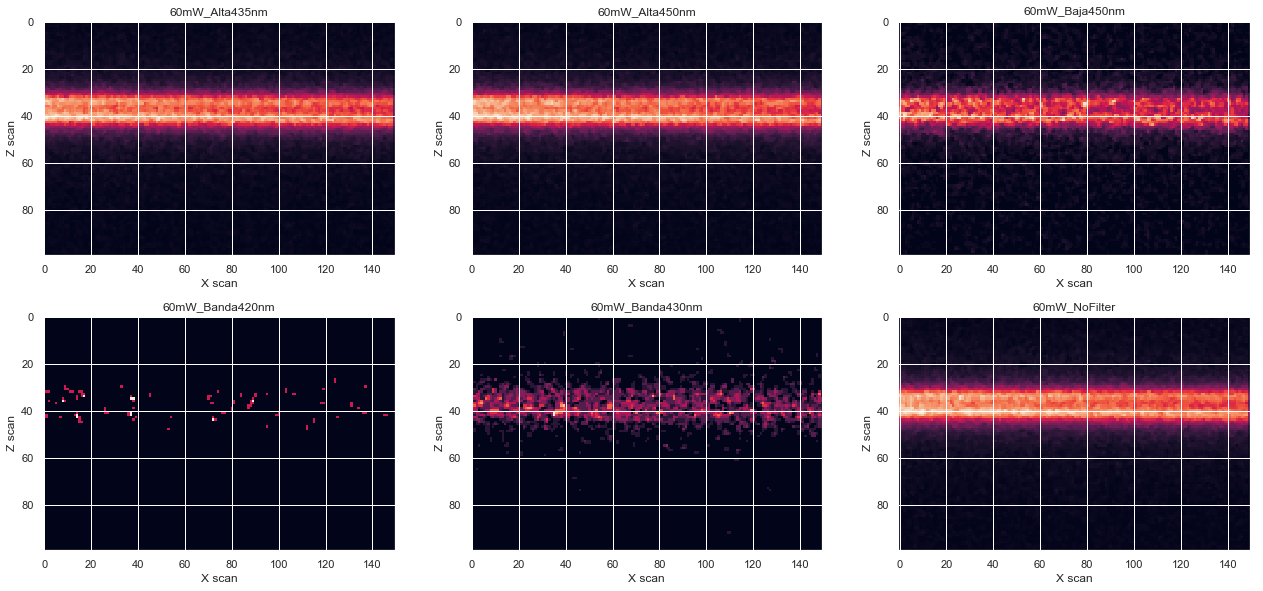

In [197]:
plot_tom_set(set_number='#3', figsize=(18,12))

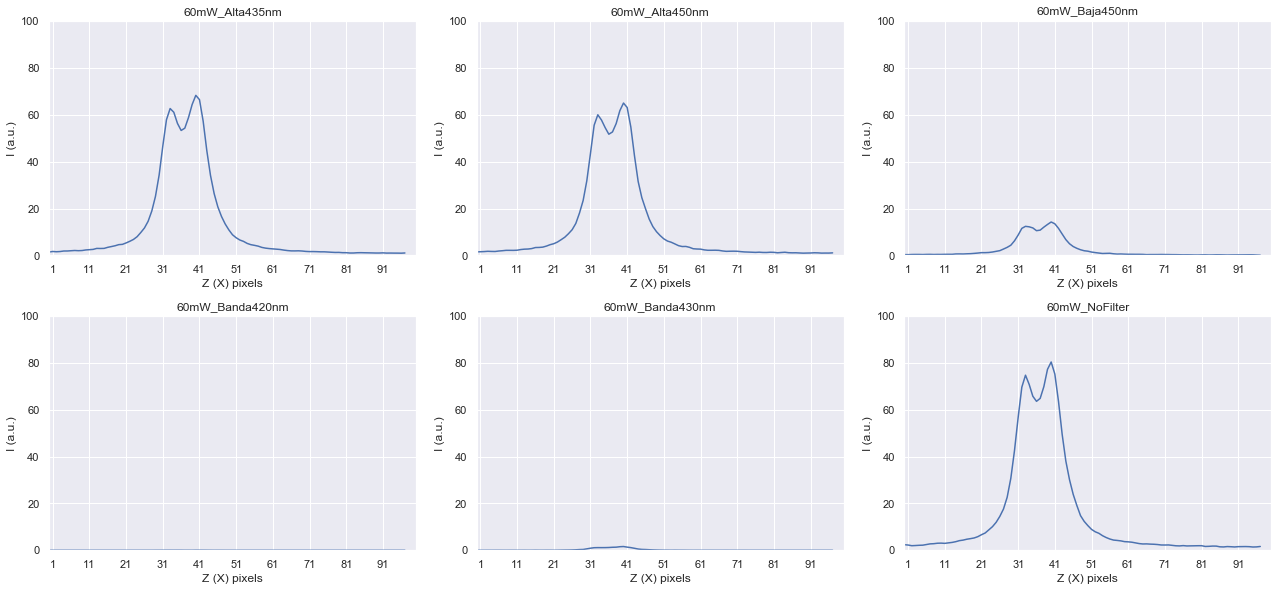

In [225]:
IP = plot_profile_set(set_number='#3', yrange=(0,100), zrange=(0,100),figsize=(18,12))

In [226]:
IP

{'60mW_Alta435nm': 1182.1866666666667,
 '60mW_Alta450nm': 1126.1633333333332,
 '60mW_Baja450nm': 233.97929362880885,
 '60mW_Banda420nm': 0.38666666666666666,
 '60mW_Banda430nm': 20.006666666666668,
 '60mW_NoFilter': 1404.8666666666668}

In [227]:
IP['60mW_Alta435nm']/IP['60mW_NoFilter']

0.841493854695582

### Sample 4
- sample #4: FIB, PMMA (cadena corta), 3%, drop coating (>8 mW)

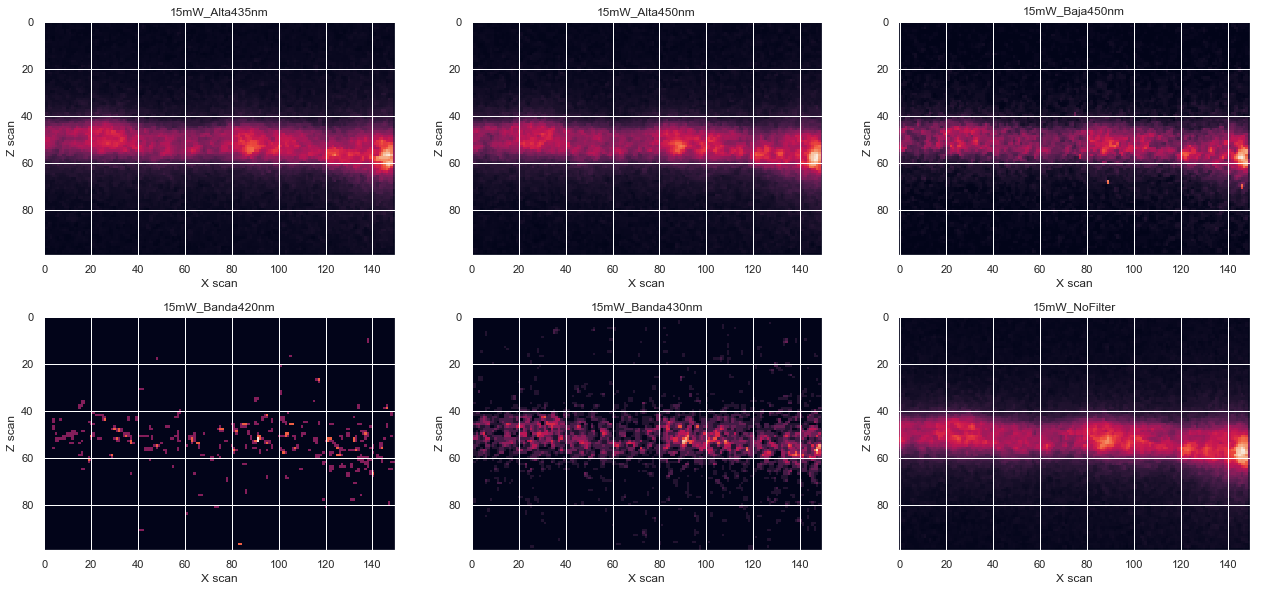

In [198]:
plot_tom_set(set_number='#4', figsize=(18,12))

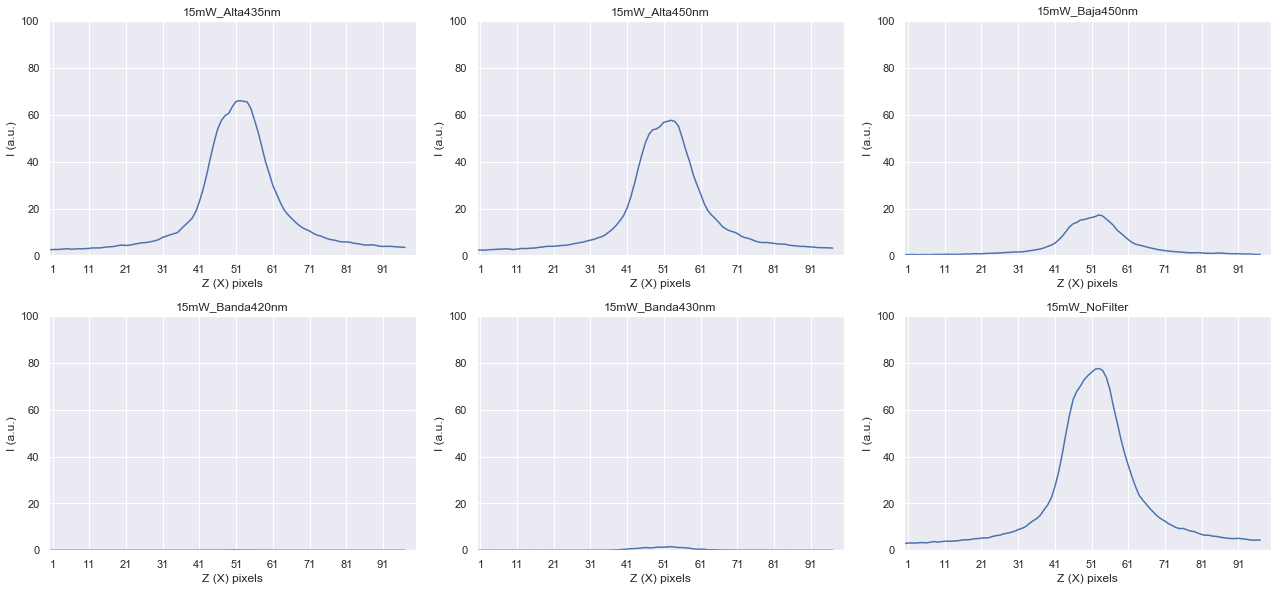

{'15mW_Alta435nm': 1599.9533333333334,
 '15mW_Alta450nm': 1408.9,
 '15mW_Baja450nm': 368.2979770615563,
 '15mW_Banda420nm': 1.8033333333333335,
 '15mW_Banda430nm': 25.621419834954317,
 '15mW_NoFilter': 1901.8933333333334}

In [229]:
IP = plot_profile_set(set_number='#4', yrange=(0,100), zrange=(0,100),figsize=(18,12))
IP

In [231]:
IP['15mW_Alta435nm']/IP['15mW_NoFilter']

0.841242411071073

### sample #5: 
- FIB-Ba, PMMA (cadena corta), 3%, drop coating (>30 mW)


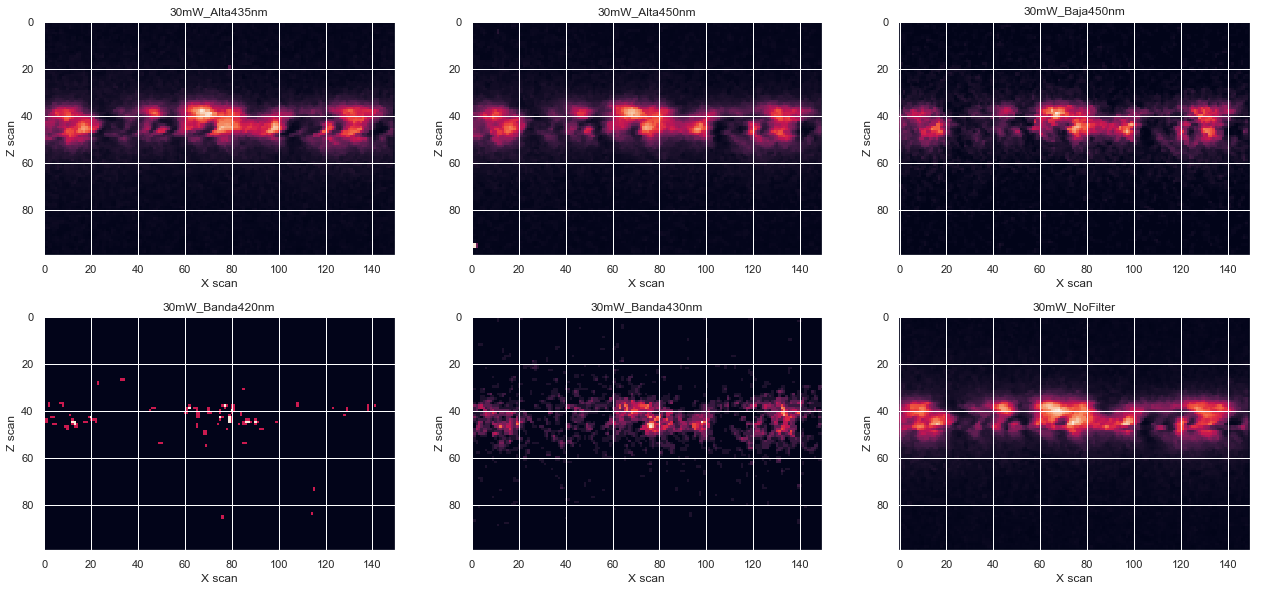

In [199]:
plot_tom_set(set_number='#5', figsize=(18,12))

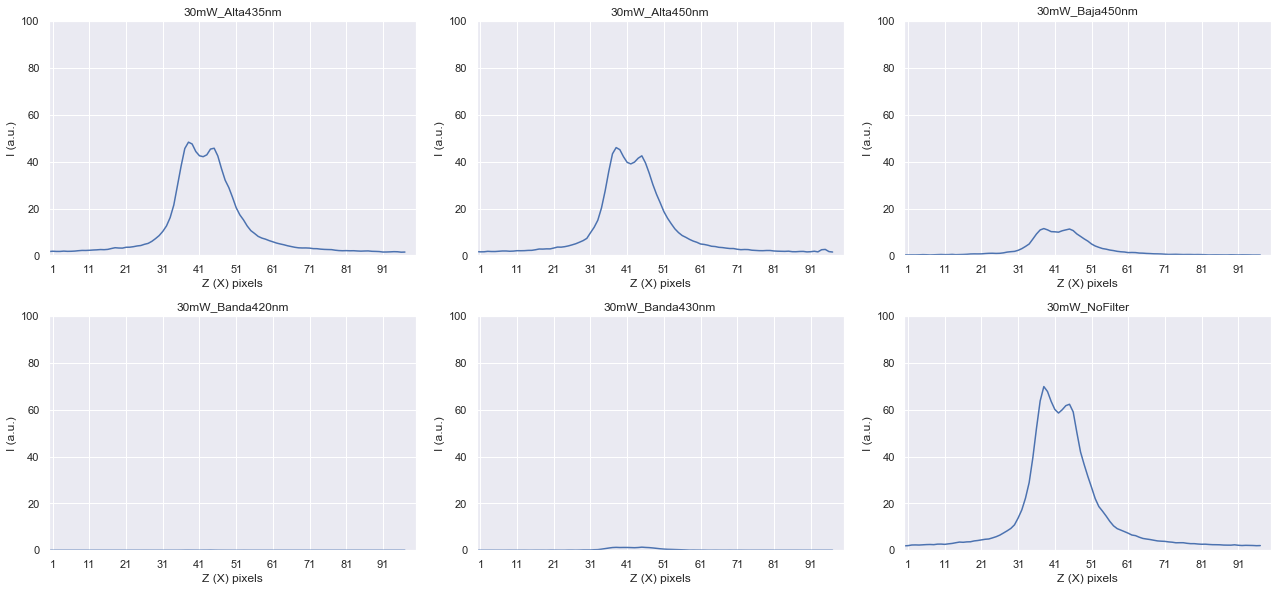

{'30mW_Alta435nm': 1007.4133333333333,
 '30mW_Alta450nm': 938.0466666666666,
 '30mW_Baja450nm': 231.07292156069468,
 '30mW_Banda420nm': 0.47000000000000003,
 '30mW_Banda430nm': 22.346666666666668,
 '30mW_NoFilter': 1357.1933333333334}

In [232]:
IP = plot_profile_set(set_number='#5', yrange=(0,100), zrange=(0,100),figsize=(18,12))
IP

In [234]:
IP['30mW_Alta435nm']/IP['30mW_NoFilter']

0.7422769539097843

### sample #6: 

- FIB-Ba (x10^3Ba), PMMA (cadena corta), 3%, drop coating (>50 mW)


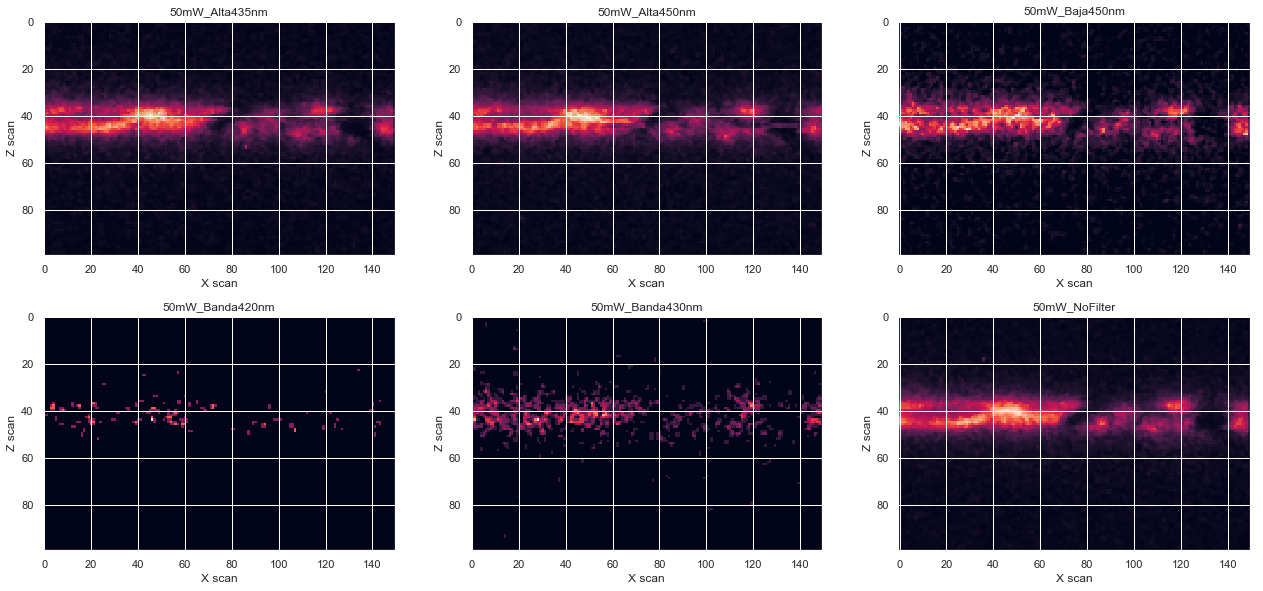

In [200]:
plot_tom_set(set_number='#6', figsize=(18,12))

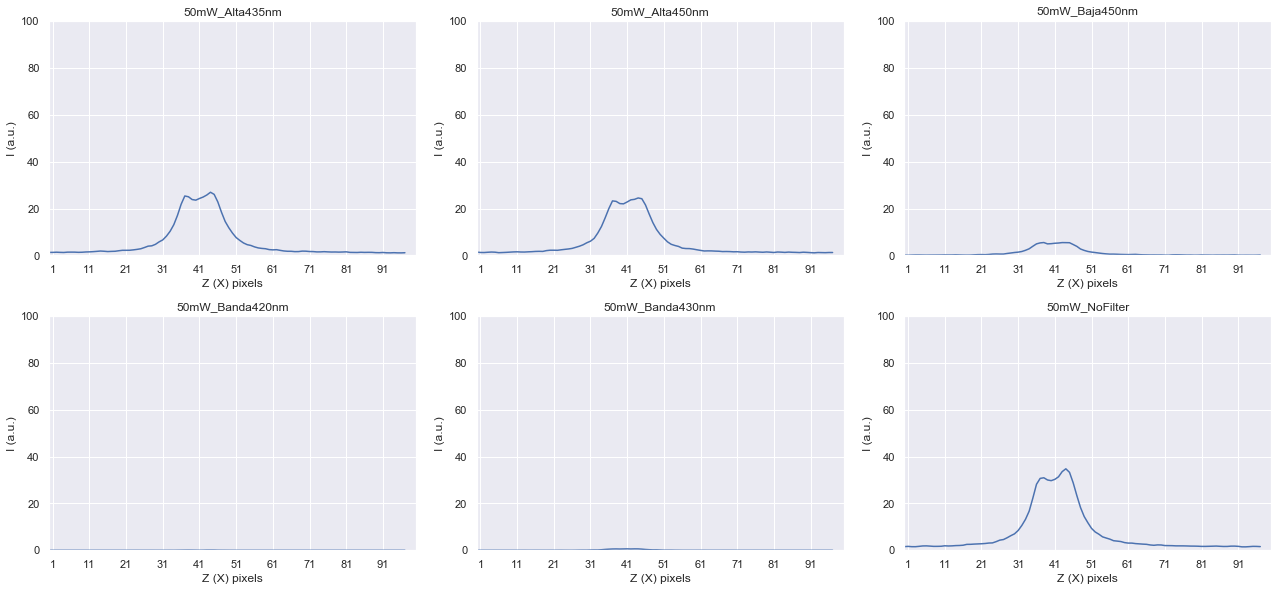

{'50mW_Alta435nm': 547.027619047619,
 '50mW_Alta450nm': 513.8833333333333,
 '50mW_Baja450nm': 105.19338628668893,
 '50mW_Banda420nm': 0.7233333333333334,
 '50mW_Banda430nm': 8.3275,
 '50mW_NoFilter': 692.55}

In [235]:
IP = plot_profile_set(set_number='#6', yrange=(0,100), zrange=(0,100),figsize=(18,12))
IP

In [236]:
IP['50mW_Alta435nm']/IP['50mW_NoFilter']

0.7898745491987857

### sample #7: 

- FIB, PMMA (cadena larga), 3%, drop coating (>7 mW o menos!!)

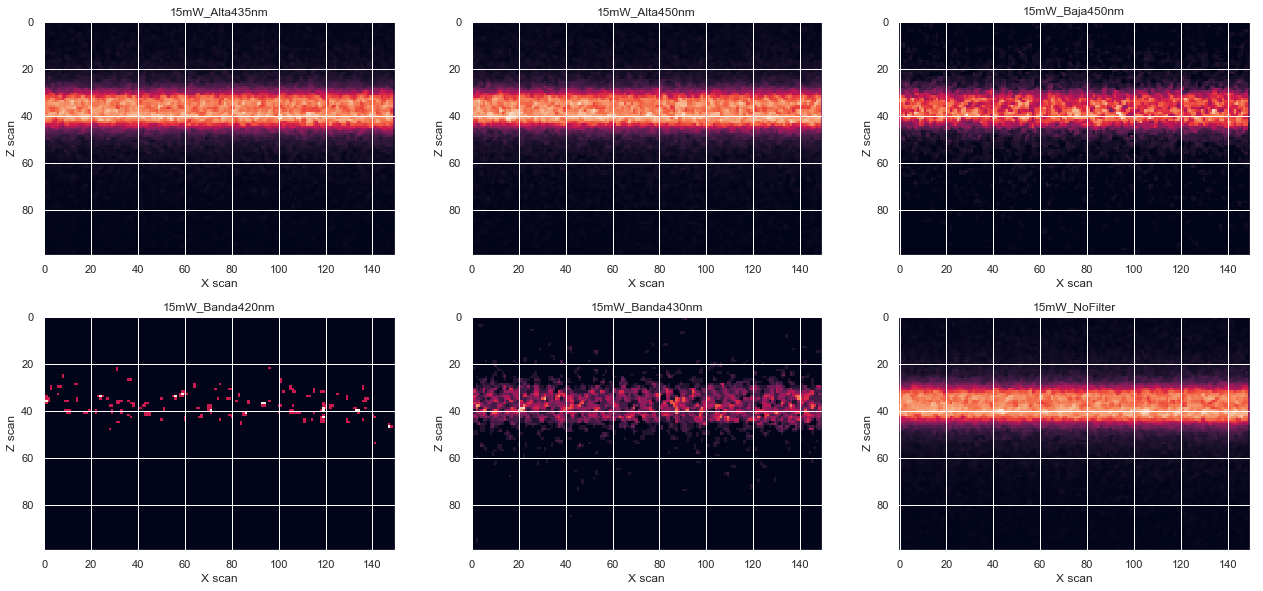

In [201]:
plot_tom_set(set_number='#7', figsize=(18,12))

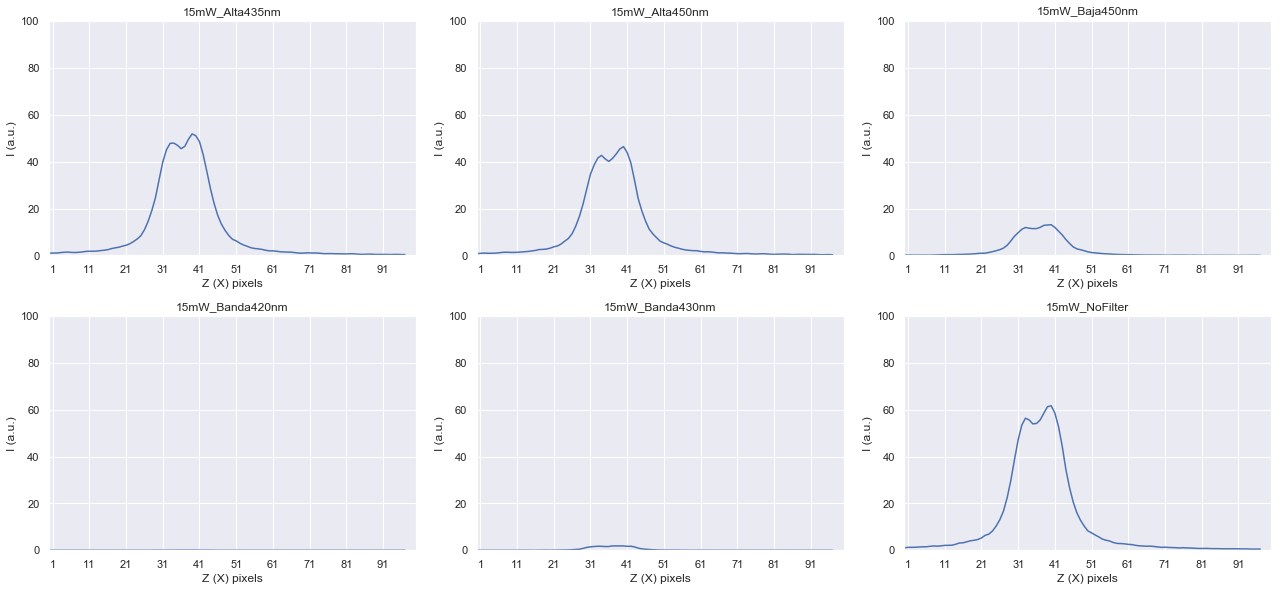

{'15mW_Alta435nm': 945.6666666666667,
 '15mW_Alta450nm': 830.4233333333333,
 '15mW_Baja450nm': 222.5933333333333,
 '15mW_Banda420nm': 0.7166666666666667,
 '15mW_Banda430nm': 29.483333333333334,
 '15mW_NoFilter': 1133.86}

In [237]:
IP = plot_profile_set(set_number='#7', yrange=(0,100), zrange=(0,100),figsize=(18,12))
IP

In [238]:
IP['15mW_Alta435nm']/IP['15mW_NoFilter']

0.8340241887593414

### sample #8: 
- FIB-Ba, PMMA (cadena larga), 3%, drop coating  (>7 mW o menos!!)

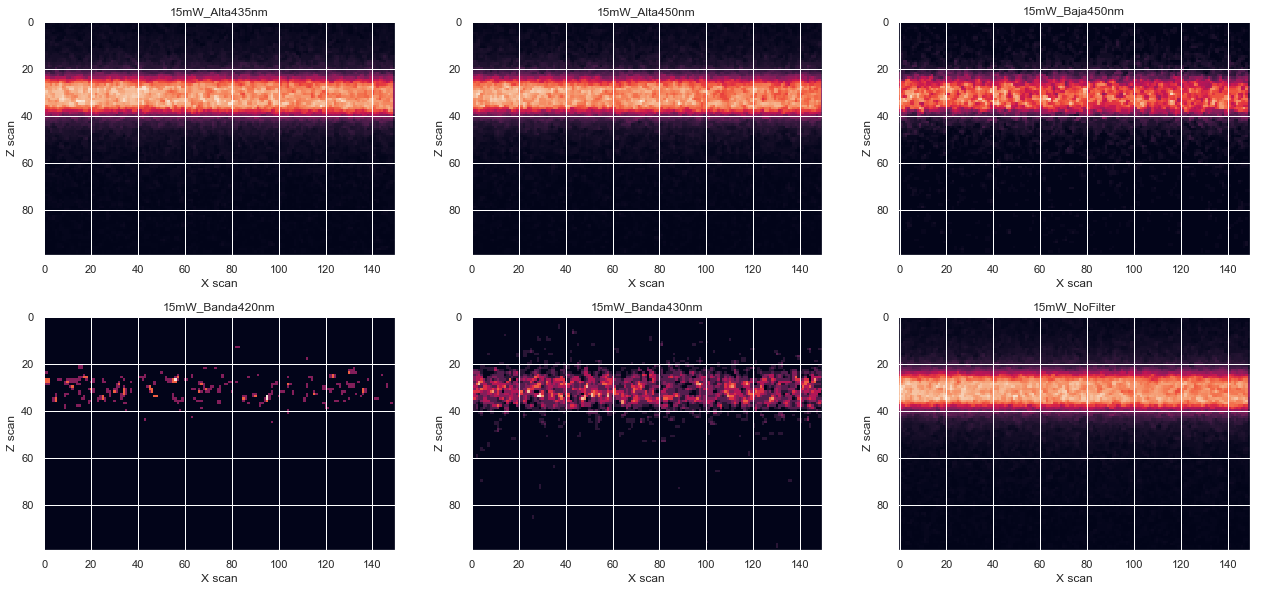

In [239]:
plot_tom_set(set_number='#8', figsize=(18,12))

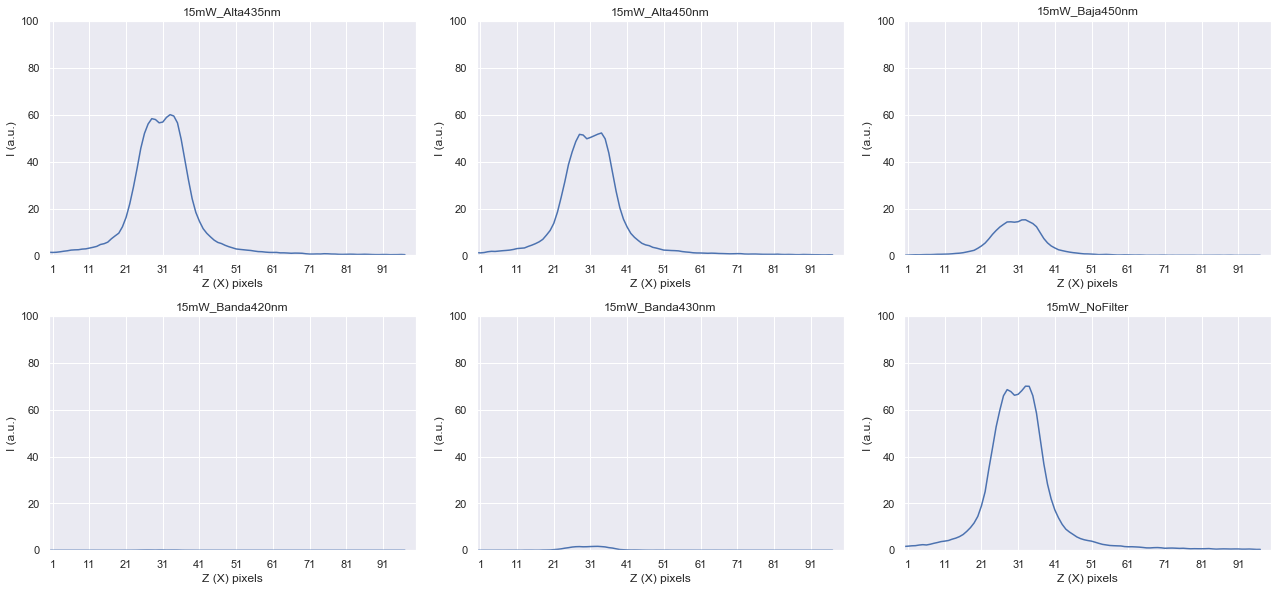

{'15mW_Alta435nm': 1089.1866666666667,
 '15mW_Alta450nm': 940.8899999999999,
 '15mW_Baja450nm': 254.23666666666665,
 '15mW_Banda420nm': 1.2266666666666666,
 '15mW_Banda430nm': 23.543333333333337,
 '15mW_NoFilter': 1277.3966666666668}

In [240]:
IP = plot_profile_set(set_number='#8', yrange=(0,100), zrange=(0,100),figsize=(18,12))
IP

In [241]:
IP['15mW_Alta435nm']/IP['15mW_NoFilter']

0.8526612720141746

### sample #9: 
- FIB-Ba (x10^3Ba), PMMA (cadena larga), 3%, drop coating  (>5 mW o menos!!)


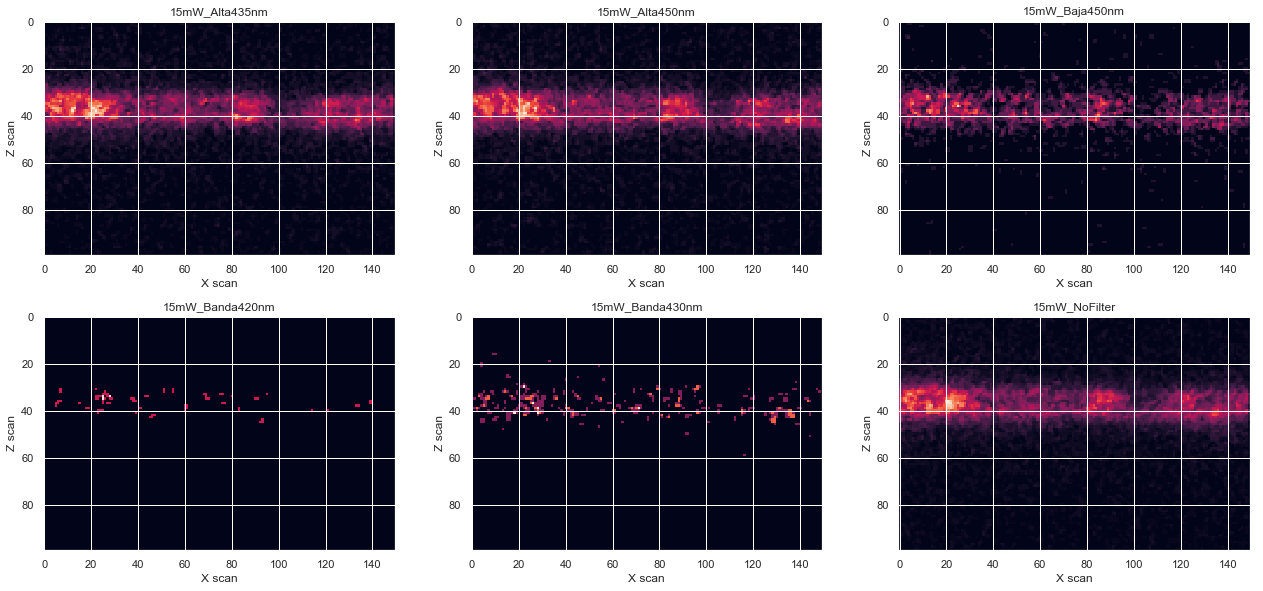

In [203]:
plot_tom_set(set_number='#9', figsize=(18,12))

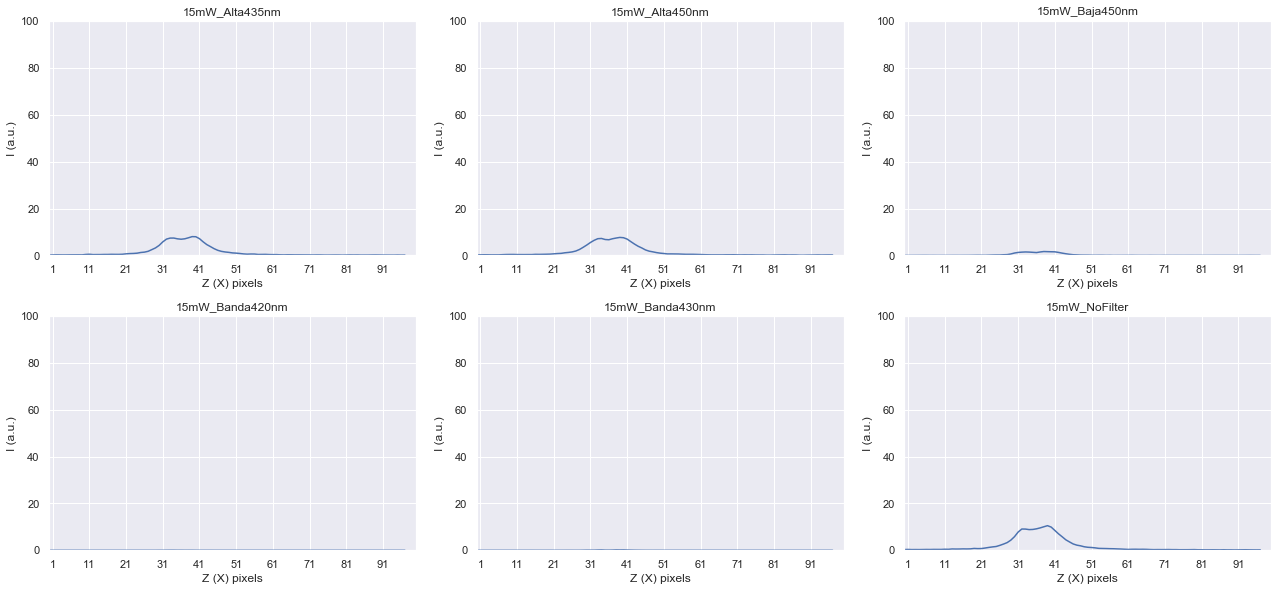

{'15mW_Alta435nm': 142.53666666666666,
 '15mW_Alta450nm': 142.93666666666667,
 '15mW_Baja450nm': 24.750000000000004,
 '15mW_Banda420nm': 0.27666666666666667,
 '15mW_Banda430nm': 1.5633333333333335,
 '15mW_NoFilter': 182.93}

In [242]:
IP = plot_profile_set(set_number='#9', yrange=(0,100), zrange=(0,100),figsize=(18,12))
IP

In [243]:
IP['15mW_Alta435nm']/IP['15mW_NoFilter']

0.7791869385375098